Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Gasper Bizjan"

---

## 13 Discrete System Part II

In this assignment we will bring all knowledge from the further assignment together. Assume a domain $\Omega\subset\mathbb{R}^d$ and $f\colon \Omega \to \mathbb{R}$ and $g\colon\Gamma\subset\partial\Omega\to\mathbb{R}$. We want to find a $u\in V$ for which the following equation holds

$$
\int_\Omega cu\phi + a\nabla u \nabla\phi = \int_\Omega f\phi   \qquad \forall \phi\in V. \qquad (1)
$$

where $a,c$ are well choosen constants and $V= \{ u \in H^1 | u = g \text{ on } \Gamma, \partial_n u = 0  \text{ on } \partial\Omega\backslash \Gamma \}$. By a full finite element discretization we have a discrete function space $V_h$ given by a lagrangian basis $\{\varphi_j\}_{j=0}^{N_p-1}$. We want to find a discrete solution $u_h = \sum_{i=0}^{N_p-1}U_j\varphi_j$ such that 

$$
\sum\limits_{j=0}^{N_p-1}U_j\int_\Omega c\varphi_j\varphi_i + a\nabla \varphi_i \nabla\varphi_j = \int_\Omega f\varphi_i   \qquad \forall i\text{ free Dofs} \qquad (2)
$$

and $U_j=g(x_j)$ for $x_j\in\Gamma$. As introduced in the lecture, this can be written as a linear system $AU=b$. We will split the system matrix $A$ by following way

$$
A_{ij} = \begin{cases}
cD_{ij} + aM_{ij}  & i \in \text{ free Dofs} \\
\delta_{ij} & \text{ else}
\end{cases} 
\quad \forall j = 0,...,N_p-1 \quad (3)
$$

$$
M_{ij} = \begin{cases}
\int_\Omega \varphi_j\varphi_i  & i \in \text{ free Dofs} \\
0 & \text{ else}
\end{cases} 
\quad \forall j = 0,...,N_p-1 \quad (4)
$$

$$
D_{ij} = \begin{cases}
\int_\Omega \nabla\varphi_j\nabla\varphi_i  & i \in \text{ free Dofs} \\
0 & \text{ else}
\end{cases} 
\quad \forall j = 0,...,N_p-1 \quad (5)
$$

$$
b_{i} = \begin{cases}
\int_\Omega f\varphi_i  & i \in \text{ free Dofs} \\
g(x_i) & \text{ else}
\end{cases}  
\quad (6)
$$




Hint: By choosing $U_j=g(x_j)$ for $x_j\in\Gamma$ thoose degrees of freedom are fixed and known befor solving the system. All the other Dofs are free and unknown. 

### 13.1 Theory

#### 13.1.1 Preparation
Derive step by step such that the we can approxmimate the components of $M$ and $D$ for the free Dofs $i$ and all Dofs $j$ by the following equation for a given quadrature rule with points $\{\hat{x},\hat{y}\}$ and weights $\{\hat{w}\}$ (7 points)

$$
M_{ij} \approx 
\sum \limits_{T \in \operatorname{supp}(\varphi_i)\cap\operatorname{supp}(\varphi_j)} 
\sum \limits_{\hat{x},\hat{y},\hat{w}} \hat{w} \cdot \hat{\phi}_{D(i,T)}(\hat{x},\hat{y})\cdot\hat{\phi}_{D(j,T)}(\hat{x},\hat{y})\cdot \vert \operatorname{det}DF_T \vert 
$$

$$
D_{ij} \approx \sum \limits_{T \in \operatorname{supp}(\varphi_i)\cap\operatorname{supp}(\varphi_j)} \sum \limits_{\hat{x},\hat{y},\hat{w}} \hat{w} \cdot (DF^{-T}\nabla\hat{\phi}_{D(i,T)}(\hat{x},\hat{y}))\cdot(DF^{-T}\nabla\hat{\phi}_{D(j,T)}(\hat{x},\hat{y}))\cdot \vert \operatorname{det}DF_T \vert 
$$



#### 13.1.2 Optimal Approximation 
In 13.1.1 we can only approximate the elements if $D$ and $M$. Under which conditions is the caculation of 13.1.1 exact? (In other word, under which conditions I can write "$=$" instead of "$\approx$"). Consider that we have the same quadrature rule for $M$ and $D$. (2 points)






 

You answer here or in a pdf file

### 13.2 Stationary Problem and the left hand site assembly

In this assignment we will finish the ```StationaryProblem``` by assembling the Boundary Conditions and the system matrix. The matrizes $M$ and $D$ will be assembled by initialization of the class and by the schemes of 13.1.1.  

#### 13.2.1 Understanding (not graded)
You know some part of the code block below by the last assignment. Understand the new Functionality. Check also the class ```GlobalBasis``` and understand the function ```evalSharedDOFMap```. Compared to assignment 12 the optional arguments support vectorizing now.

#### 13.2.2  Boundary Conditions. 

Write a member function ```assembleBoundaryConditions``` which assemble the dirichlet Dofs of $A$ and $b$ as in the scheme (3) and (6). You can modify thoos Dofs directly in the system matrix and in the system vector. <br>
<b>INPUT:</b>  ```g``` lambda function ```g = lambda x,y: foo``` values of $u$ on the boundary (as $g$ as above).  

Hints:<br> 
Understand the member function ```assemble``` to understand the interaction of the dirichlet Dofs of $A,M,D$. <br>
For debugging, check Dirichlet, Neumann and mixed boundary conditions.

#### 13.2.3 initalMass $M$
Write a member function ```initialMass``` which assembles the free degrees of freedom of the mass matrix $M$ and store the values in the member ```self.mass```. Make sure that prefactor $c$ of the Reaction term is NOT part of $M$. 
<br>Hint: No Input and no return value. 

#### 13.2.4 initalDiffusion $D$
Write a member function ```initialDiffusion``` which assembles the free degrees of freedom of the diffusion matrix $D$ and store the values in the member ```self.diffusion```. Make sure that prefactor $a$ of the Diffusion term is NOT part of $D$. 
<br>Hint: No Input and no return value. 

#### 13.2.5 solving
Write a member function ```solve``` which solves the linear system $AU=b$ and stores $U$ as the solution vector ```self.solution```. 
<br>Hint: No Input and no return value. 

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as triang

import grid
import basis
import quadrule

class StationaryProblem():
    def __init__(self, globalBasis, quadrature, dirichletLocations = (lambda x,y: np.ones_like(x,dtype=bool)), dirichletValues = (lambda x,y: np.zeros_like(x))):
        self.grid = globalBasis.grid
        self.basis = globalBasis.basis
        self.globalBasis = globalBasis
        self.quadrature = quadrature
        
        # Boundary Conditions
        self.dirichletDOFs = self.grid.getBoundaryIndices(dirichletLocations)
        self.allDOFs = np.arange(np.shape(self.grid.points)[0])
        self.freeDOFs = np.setdiff1d(np.arange(np.shape(self.grid.points)[0]),self.dirichletDOFs)
    
        # Precompute data that is needed all the time.
        self.xkHat,self.wkHat = self.quadrature.getPointsAndWeights() # x_k and w_k
        self.xkTrafo = self.grid.evalReferenceMap(self.xkHat)  # x_k and w_k
        self.adet = self.grid.getDeterminants() # abs(det(DT))
        self.invJacT = self.grid.getInverseJacobiansT() # DT^-T
    
        # phi(x_k) and grad_phi(x_k)
        self.phi = self.basis.evalPhi(self.xkHat)
        self.gradPhi = self.basis.evalGradPhi(self.xkHat)

        # the new functionality is added here
        #
        # Initializing
        self.systemMatrix = np.zeros((np.shape(self.grid.points)[0],np.shape(self.grid.points)[0]))
        self.systemVector = np.zeros(np.shape(self.grid.points)[0])
        self.solution = None

        # Default Matrizes for the assembler of the system Matrix. 
        # The Massmatrix. (phi_j , phi_i)_L2
        # The Diffusionmatrix (nabla phi_j , nabla phi_i)_L2
        self.mass = np.zeros((np.shape(self.grid.points)[0],np.shape(self.grid.points)[0]))
        self.diffusion = np.zeros((np.shape(self.grid.points)[0],np.shape(self.grid.points)[0]))
    
        # initial functions
        self.initialMass()
        self.initialDiffusion()
        self.a = 0.0
        self.c = 0.0
        self.assembleBoundaryConditions(dirichletValues)
        #
        # end init 
  
    # the function added in assignment 12
    def addSource(self, f):
        for i in self.freeDOFs:
            supp,localInd = self.globalBasis.evalDOFMap(i)
            for T,loc_i in zip(supp,localInd):
                self.systemVector[i] += self.adet[T] * np.sum(self.phi[:,loc_i] * self.wkHat * f(self.xkTrafo[T,:,0],self.xkTrafo[T,:,1]))
    
    # setter functions for the prefactors of D and M
    def setReaction(self,c):
        self.c = c
    
    def setDiffusion(self,a):    
        self.a = a

    def assemble(self):
        self.systemMatrix += self.c*self.mass + self.a*self.diffusion
  
  # #####################
    
    def initialMass(self):
        for i in self.freeDOFs:
                for j in self.freeDOFs:
                    supp_ij, localInd_i, localInd_j = self.globalBasis.evalSharedDOFMap(i, j)
                    for T,loc_i,loc_j in zip(supp_ij,localInd_i,localInd_j):
                        self.mass[i, j] += self.adet[T] * np.sum(self.phi[:,loc_i] * self.phi[:,loc_j] * self.wkHat)
        
    def initialDiffusion(self):
        for k in range(len(self.wkHat)):
            for i in self.freeDOFs:
                for j in self.freeDOFs:
                    supp_ij,localInd_i,localInd_j = self.globalBasis.evalSharedDOFMap(i, j)
                    for T,loc_i,loc_j in zip(supp_ij,localInd_i,localInd_j):
                        self.diffusion[i, j] += self.adet[T] * self.wkHat[k] * (self.invJacT[T]@self.gradPhi[k,loc_i]) @ (self.invJacT[T]@self.gradPhi[k,loc_j])


    def assembleBoundaryConditions(self, g = lambda x,y: foo):
        # System matrix boundary condition
        self.systemMatrix[self.dirichletDOFs,self.dirichletDOFs] = 1.0
        # System vector boundary condition
        self.systemVector[self.dirichletDOFs] = g(self.grid.points[:,0], self.grid.points[:,1])[self.dirichletDOFs]
        
    def solve(self):
        self.assemble()
        #print(self.systemMatrix)
        #print(self.systemVector)
        self.solution = np.linalg.solve(self.systemMatrix, self.systemVector)
        return self.solution
  
  ################################
    
    def show(self):
        fig = plt.figure()
        # limits
        ax = fig.add_subplot(1,1,1)
        ax.set_xlim([self.globalBasis.grid.xlow, self.globalBasis.grid.xhigh])
        ax.set_ylim([self.globalBasis.grid.ylow, self.globalBasis.grid.yhigh])
        ax.axis('equal')
        Triangulation = triang.Triangulation(self.globalBasis.grid.points[:,0],self.globalBasis.grid.points[:,1],self.globalBasis.grid.cells)
        tri = ax.tripcolor(Triangulation,self.solution,shading='gouraud')
        fig.colorbar(tri)
        plt.show()

#### 13.3 Solve a Problem (this part is graded but you can pass the assignment without)

Let assume the given problem 
$$
c \int_\Omega u\phi + a\int_\Omega\nabla u \nabla\phi = \int_\Omega f\phi   \qquad \forall \phi\in V.
$$

where $a=1$ and $c=0.1$ on the domain $\Omega=[-1,1]^2$ with $\Gamma=\{(x,y)\vert x=1\}$ and a given source term $f(x,y)=1.0$ and boundary values $g(x,y)=0$. Inital a stationary problem call ```problem``` and solve it. Use a regular uniform grid with $10\times10$ points and a second order quadrature rule. Show the solution. 

Hint: you can find all the classes you need in the corresponding files. 

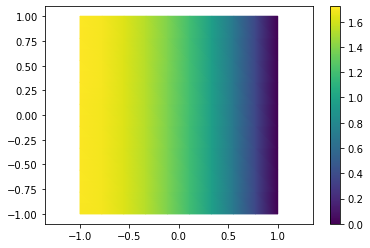

In [23]:
np.set_printoptions(precision=2, suppress=True)

# grid, basis
g = grid.Grid(-1,1,-1,1,10,10)
b = basis.Basis()
# global basis
globalB = basis.GlobalBasis(g, b)
#  Quadrature rule
qr = quadrule.QuadratureRule(2)

# Source
f = lambda x,y: np.ones_like(x)

# Locator
loc = lambda x,y: x==1

# Stationary problem
problem = StationaryProblem(globalB, qr, dirichletLocations = loc, dirichletValues = (lambda x,y: np.zeros_like(x)))
problem.addSource(f)
problem.setReaction(0.1)
problem.setDiffusion(1)
problem.solve()
problem.show()